In [1]:
#Enivornment Setup

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [3]:
#Data Read, Data Visualization,EDA Analysis,Data Pre-Processing,Data Splitting

In [4]:
#Data Read
file_path = '../input/social-network-ads'
df=pd.read_csv(f'{file_path}/Social_Network_Ads.csv')

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df = df.loc[:,~df.columns.duplicated()]

In [7]:
import pandas_profiling

In [8]:
# preparing profile report

profile_report = pandas_profiling.ProfileReport(df,minimal=True)
profile_report

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [10]:
X = df.drop('User ID', axis=1)

In [11]:
df=X.copy()

In [12]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [13]:
df.shape

(400, 4)

In [14]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [15]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [16]:
df.groupby("Gender").mean()

,Age,EstimatedSalary,Purchased
Gender,,,
Female,38.411765,71759.803922,0.377451
Male,36.867347,67642.857143,0.336735


In [17]:
df.groupby("Age").mean()

,EstimatedSalary,Purchased
Age,,
18,66400.000000,0.000000
19,46000.000000,0.000000
20,61714.285714,0.000000
21,61000.000000,0.000000
22,48800.000000,0.000000
23,51166.666667,0.000000
24,49111.111111,0.000000
25,65166.666667,0.000000
26,53500.000000,0.000000


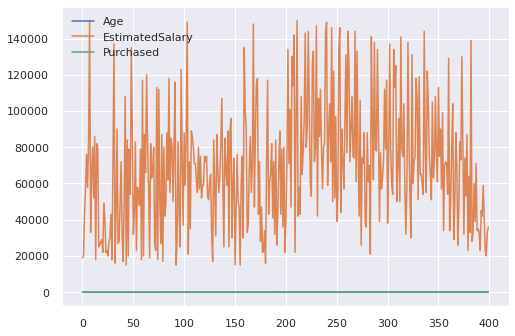

In [18]:
import seaborn; seaborn.set()
df.plot();

In [19]:
df.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


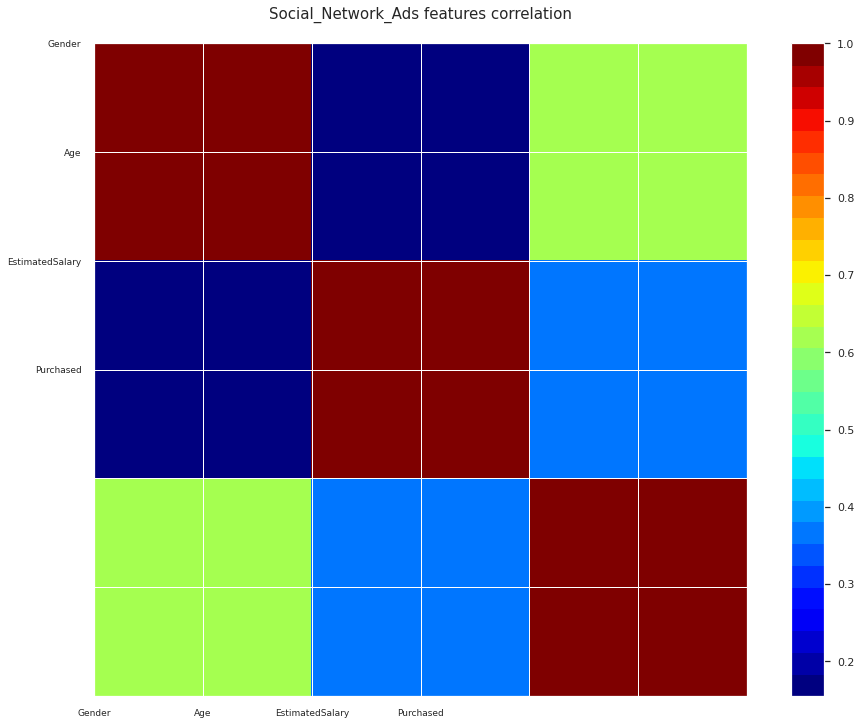

In [20]:
def correlation_matrix(d):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Social_Network_Ads features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

In [21]:
#Plotting data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

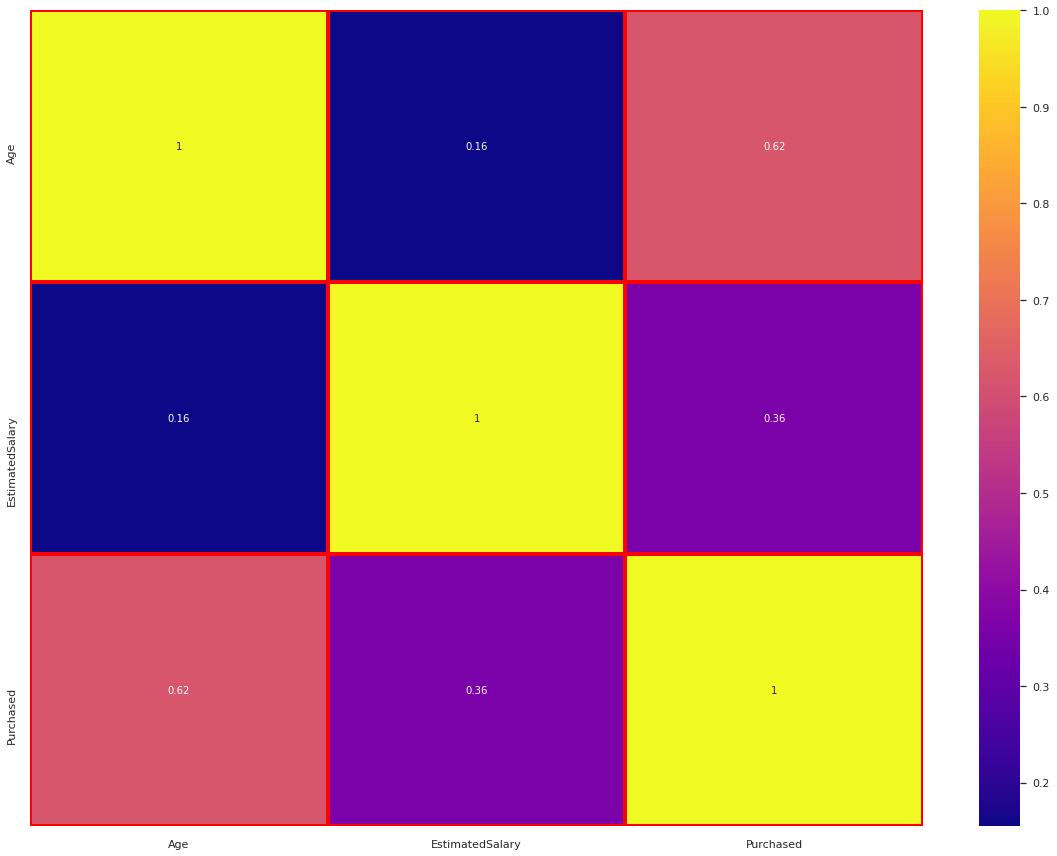

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linecolor='red',linewidths=3,cmap = 'plasma')

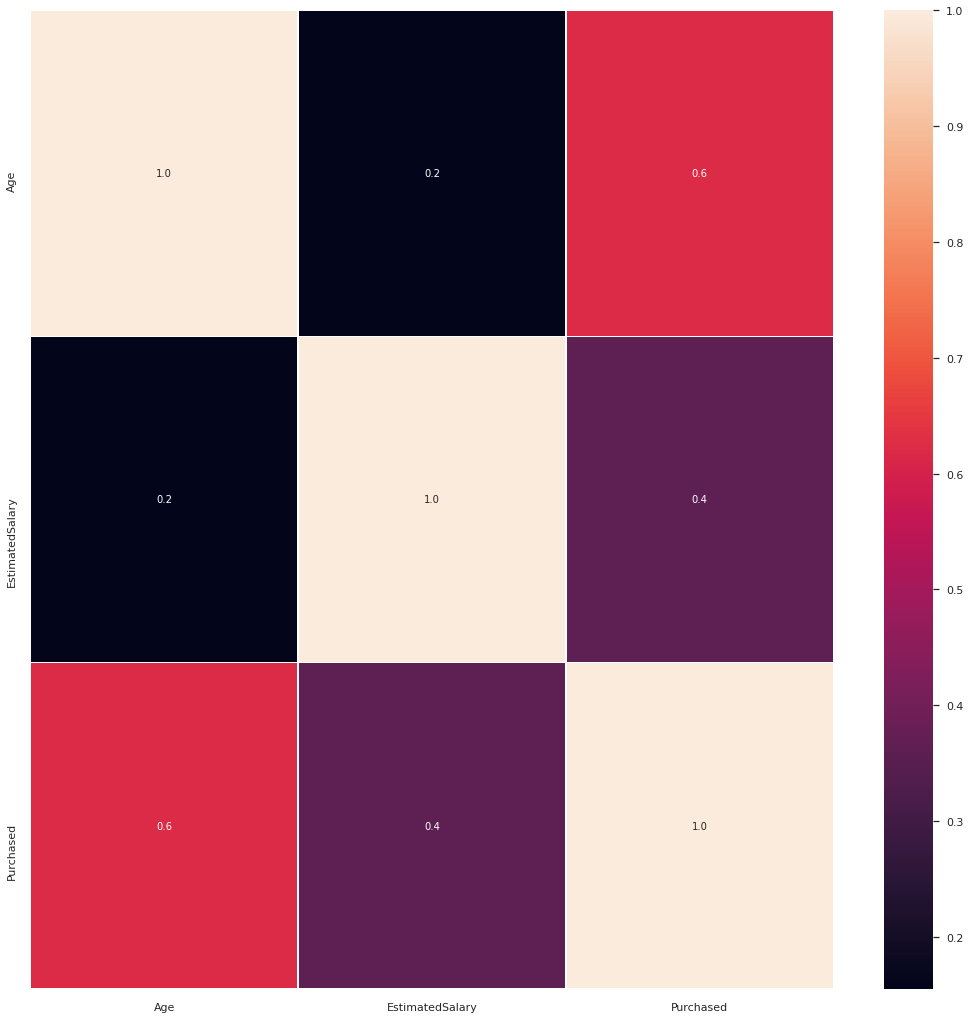

In [23]:
f,ax=plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(),annot=True, linewidths=.5,fmt='.1f',ax=ax)

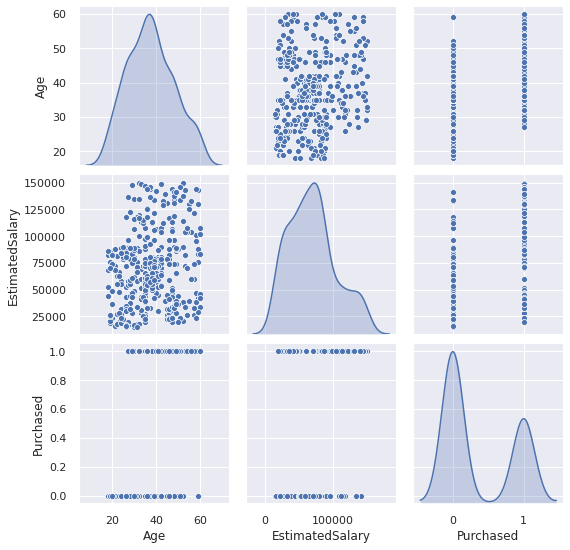

In [24]:
sns.pairplot(df,diag_kind="kde")
plt.show()

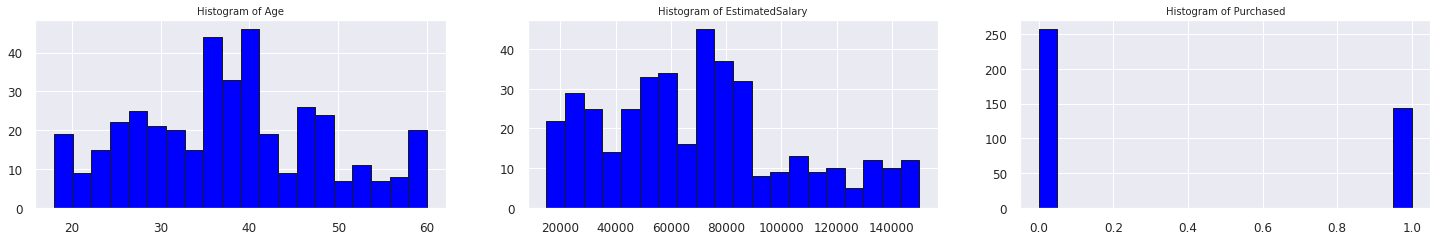

In [25]:
i=1
plt.figure(figsize=(25,20))
for c in df.describe().columns[:]:
    plt.subplot(5,3,i)
    plt.title(f"Histogram of {c}",fontsize=10)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='blue',edgecolor='k')
    i+=1
plt.show()

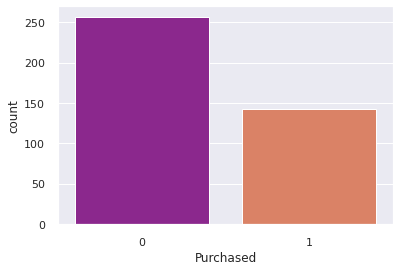

In [26]:
#checking the target variable countplot
sns.countplot(data=df,x = 'Purchased',palette='plasma')

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = le.fit_transform(df[col])

In [29]:
df=df.copy()

In [30]:
df.head(n=20)

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
5,1,27,58000,0
6,0,27,84000,0
7,0,32,150000,1
8,1,25,33000,0
9,0,35,65000,0


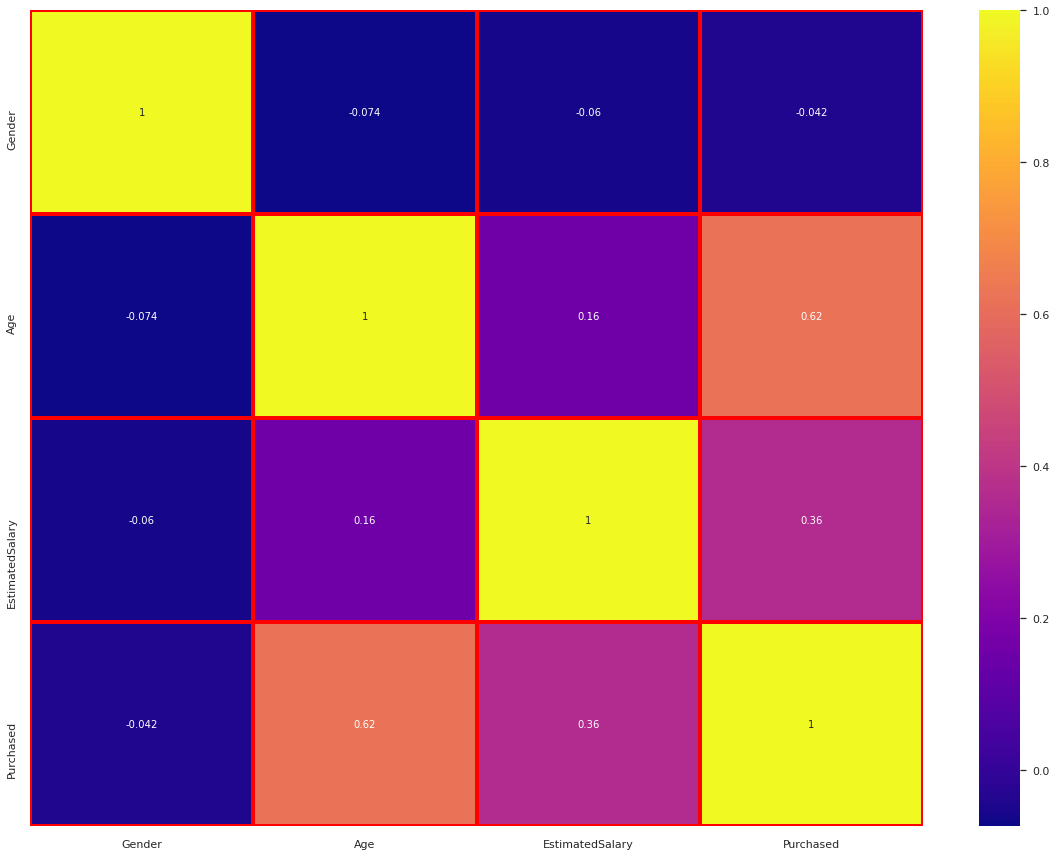

In [31]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,linecolor='red',linewidths=3,cmap = 'plasma')

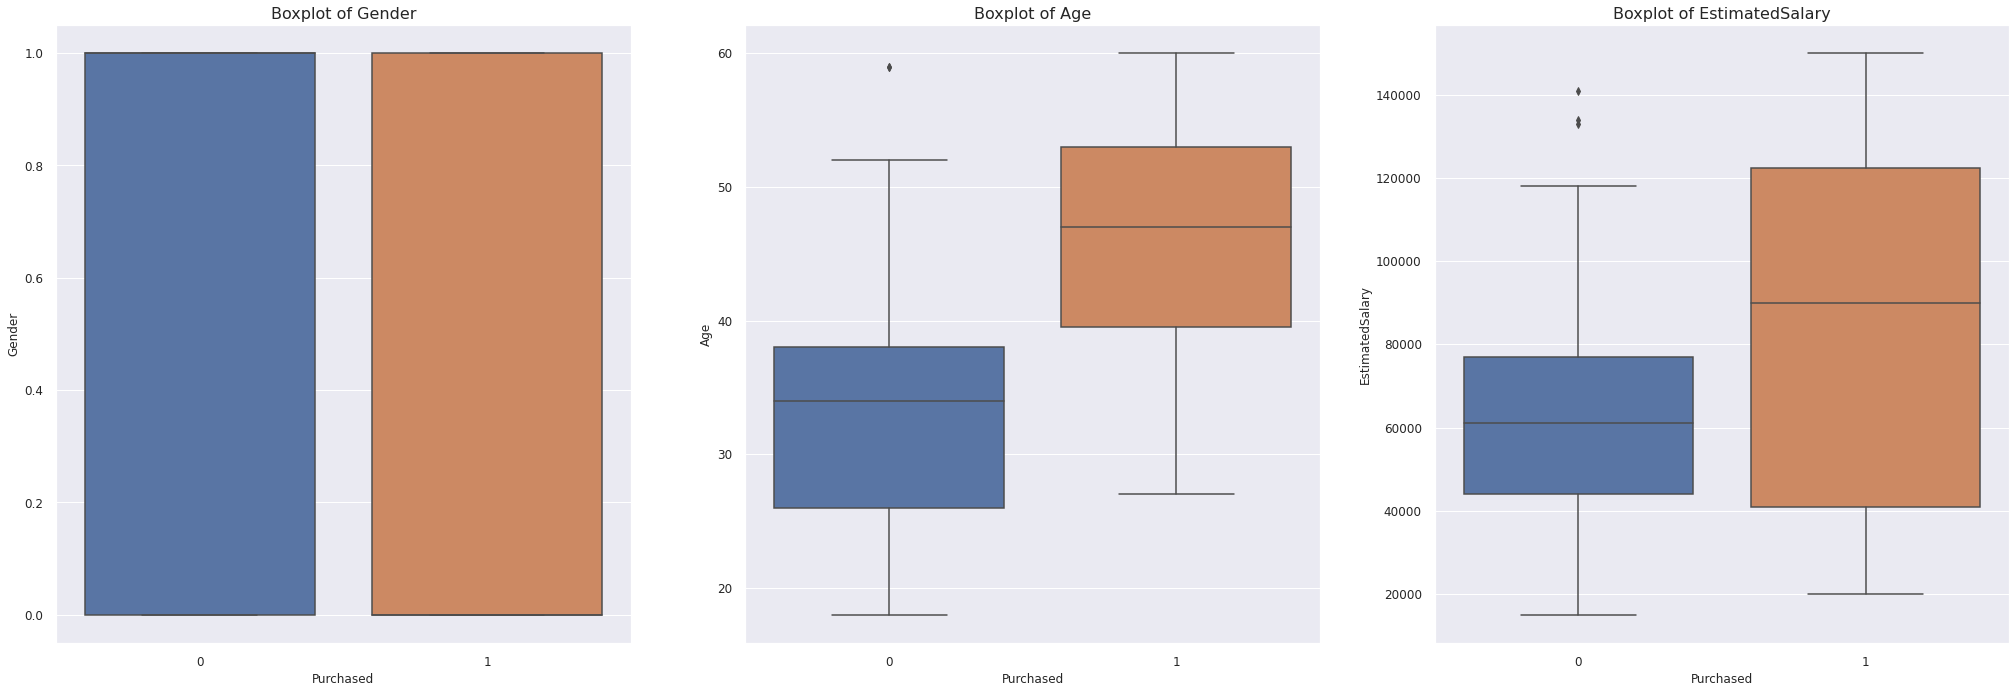

In [32]:
i=1
plt.figure(figsize=(35,25))
for c in df.columns[:-1]:
    plt.subplot(2,3,i)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['Purchased'])
    i+=1
plt.show()

In [33]:
#Numerical Columns data distribution

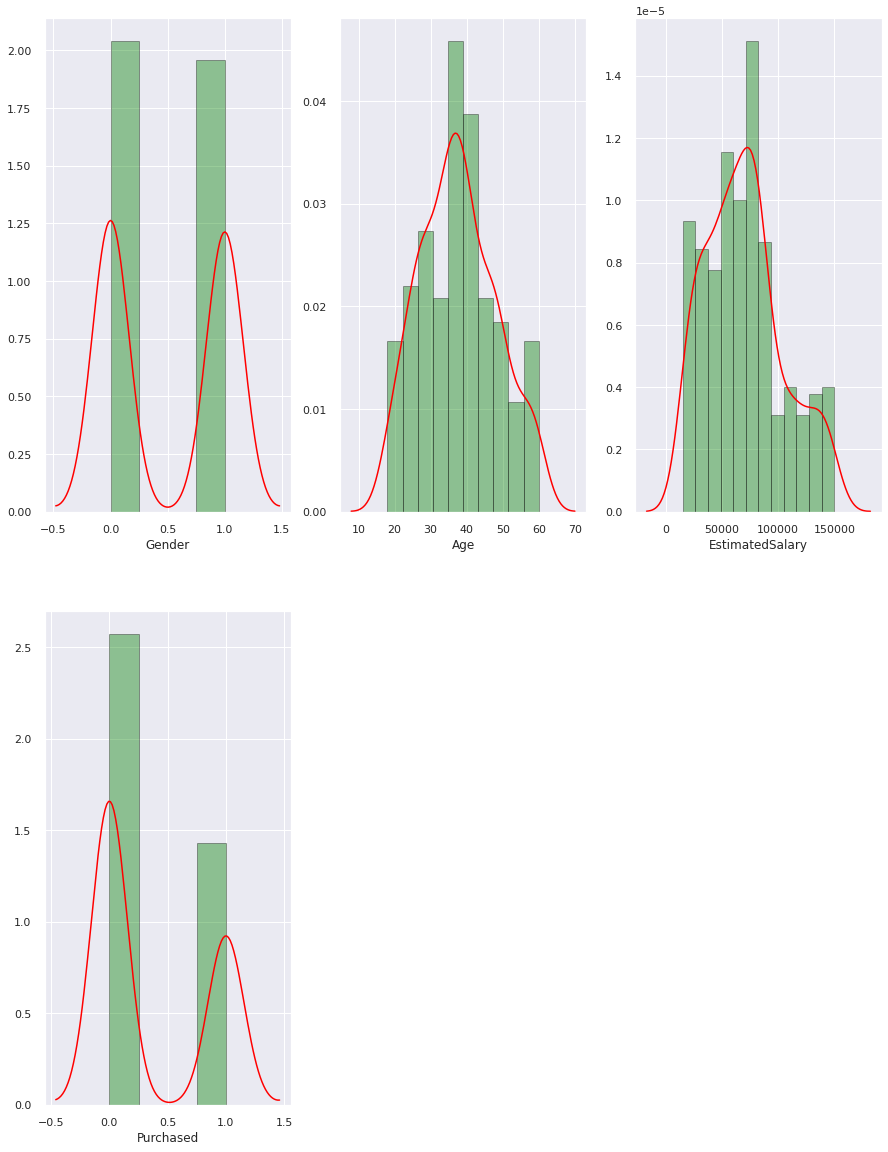

In [34]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['Gender', 'Age', 'EstimatedSalary', 'Purchased']
cnt = 1
for col in cols :
    plt.subplot(2,3,cnt)
    sns.distplot(df[col],hist_kws=dict(edgecolor="k", linewidth=1,color='green'),color='red')
    cnt+=1
plt.show() 

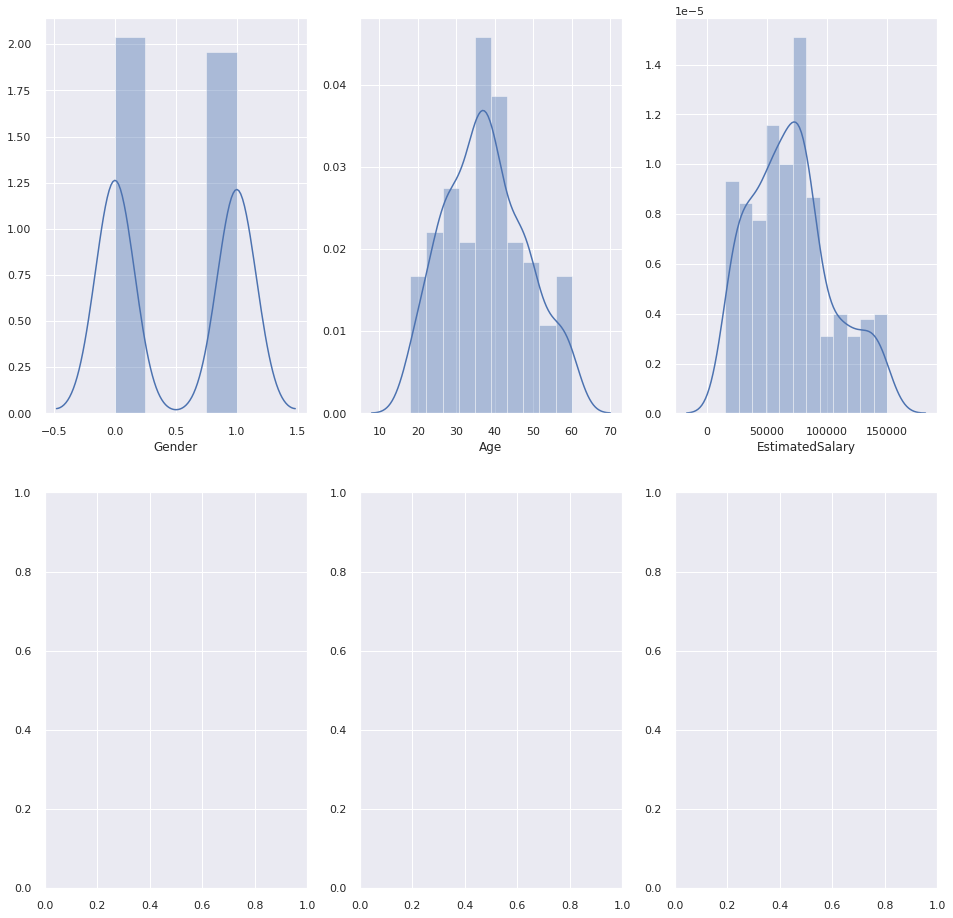

In [35]:
# Distplot
fig, ax2 = plt.subplots(2, 3, figsize=(16, 16))
sns.distplot(df['Gender'],ax=ax2[0][0])
sns.distplot(df['Age'],ax=ax2[0][1])
sns.distplot(df['EstimatedSalary'],ax=ax2[0][2])

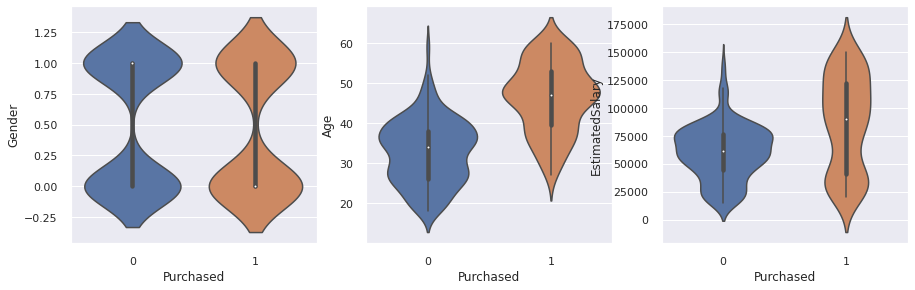

In [36]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['Gender', 'Age', 'EstimatedSalary']
cnt = 1
for col in cols :
    plt.subplot(4,3,cnt)
    sns.violinplot(x="Purchased", y=col, data=df)
    cnt+=1
plt.show()

In [37]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

In [39]:
ec = ExtraTreesClassifier(n_estimators=100, random_state=0)
ec.fit(X,y)

ExtraTreesClassifier(random_state=0)

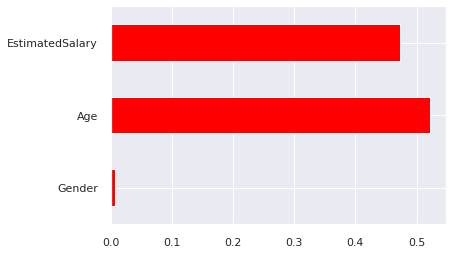

In [40]:
ec_series = pd.Series(ec.feature_importances_,index=X.columns)
ec_series.plot(kind = 'barh',color = 'red')

In [41]:
from sklearn.model_selection import  train_test_split, cross_val_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [42]:
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state=42)

In [43]:
dims = X_train.shape[1]
print(dims, 'dims')

3 dims


In [44]:
print(y_train)

124    0
294    0
255    1
78     0
101    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 340, dtype: int64


In [45]:
#Data Pre-Processing & Supervised machine Learning Models Performance

In [46]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [47]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [48]:
#For Support vector Algorithm
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [49]:
predictions = model.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(confusion_matrix(y_test,predictions))

[[38  3]
 [ 0 19]]


In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.86      1.00      0.93        19

    accuracy                           0.95        60
   macro avg       0.93      0.96      0.94        60
weighted avg       0.96      0.95      0.95        60



In [53]:
#Parameter tuning
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [54]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

# May take a while!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [55]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [56]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [57]:
grid_predictions = grid.predict(X_test)

In [58]:
print(confusion_matrix(y_test,grid_predictions))

[[38  3]
 [ 0 19]]


In [59]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.86      1.00      0.93        19

    accuracy                           0.95        60
   macro avg       0.93      0.96      0.94        60
weighted avg       0.96      0.95      0.95        60



In [60]:
param_grid = {'C': [50,75,100,125,250], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(tol=1e-5),param_grid,refit=True,verbose=1)
grid.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.5s finished


GridSearchCV(estimator=SVC(tol=1e-05),
             param_grid={'C': [50, 75, 100, 125, 250],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05, 1e-06],
                         'kernel': ['rbf']},
             verbose=1)

In [61]:
grid.best_estimator_

SVC(C=250, gamma=0.01, tol=1e-05)

In [62]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[38  3]
 [ 0 19]]


In [63]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.86      1.00      0.93        19

    accuracy                           0.95        60
   macro avg       0.93      0.96      0.94        60
weighted avg       0.96      0.95      0.95        60



In [64]:
#Using DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini',max_depth=9)

In [65]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [66]:
predictions = dtree.predict(X_test)

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60



In [69]:
cm=confusion_matrix(y_test,predictions)
print(cm)

[[37  4]
 [ 6 13]]


In [70]:
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

Accuracy of prediction: 0.833


In [71]:
#Using RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)

In [72]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [73]:
rfc_pred = rfc.predict(X_test)

In [74]:
cr = classification_report(y_test,predictions)

In [75]:
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        41
           1       0.76      0.68      0.72        19

    accuracy                           0.83        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60



In [76]:
#Using XGBboost Classifier

In [77]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [78]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [80]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.00%


In [81]:
#Models performance Analysis with scaling(standard Scaler)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
list_models=[]
list_scores=[]
x_train=sc.fit_transform(X_train)
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
pred_1=lr.predict(sc.transform(X_test))
score_1=accuracy_score(y_test,pred_1)
list_scores.append(score_1)
list_models.append('LogisticRegression')

In [83]:
score_1

0.9

In [84]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    preds=knn.predict(sc.transform(X_test))
    scores=accuracy_score(y_test,preds)
    list_1.append(scores)

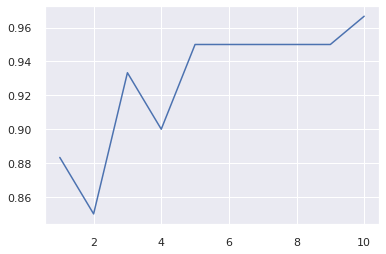

In [85]:
sns.lineplot(x=list(range(1,11)),y=list_1)

In [86]:
list_scores.append(max(list_1))
list_models.append('KNeighbors Classifier')

In [87]:
print(max(list_1))

0.9666666666666667


In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_2=rfc.predict(sc.transform(X_test))
score_2=accuracy_score(y_test,pred_2)
list_models.append('Randomforest Classifier')
list_scores.append(score_2)

In [89]:
score_2

0.9

In [90]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
pred_3=svm.predict(sc.transform(X_test))
score_3=accuracy_score(y_test,pred_3)
list_scores.append(score_3)
list_models.append('Support vector machines')

In [91]:
score_3

0.95

In [92]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred_4=xgb.predict(sc.transform(X_test))
score_4=accuracy_score(y_test,pred_4)
list_models.append('XGboost')
list_scores.append(score_4)

In [93]:
score_4

0.9

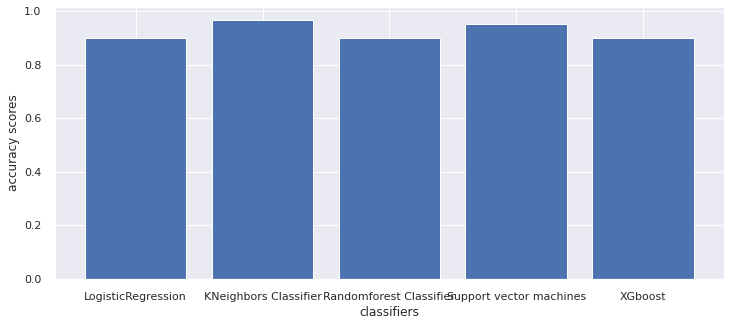

In [94]:
plt.figure(figsize=(12,5))
plt.bar(list_models,list_scores)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')
plt.show()

In [95]:
#Esamble models: # importing libraries 

In [96]:
from sklearn.decomposition import PCA
from sklearn.utils import resample
import tensorflow as t


In [97]:

from sklearn.ensemble import VotingClassifier ,BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,RobustScaler,StandardScaler
import xgboost 
from sklearn.svm import LinearSVR,SVR

from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,train_test_split
from sklearn.metrics import accuracy_score 
from numpy import mean,std
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression,BayesianRidge,ElasticNet,Lasso,SGDRegressor,Ridge
from sklearn.kernel_ridge import KernelRidge

from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import KernelPCA
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.base import BaseEstimator,clone,TransformerMixin,RegressorMixin

from scipy.stats import skew
from scipy.stats.stats import pearsonr
from matplotlib import pyplot

from matplotlib.pyplot import figure
figure(num=2, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
%matplotlib inline
seed = 2020
np.random.seed(seed)

In [98]:
# Ensemble of Models 
estimator = [] 
estimator.append(('LR',LogisticRegression(solver ='lbfgs',multi_class ='multinomial',max_iter = 200))) 
estimator.append(('SVC', SVC(gamma ='auto', probability = True))) 
estimator.append(('DTC', DecisionTreeClassifier()))

estimator.append(('RandomForestClassifier', RandomForestClassifier()))  
estimator.append(('AdaBoostClassifier', AdaBoostClassifier())) 
estimator.append(('GradientBoostingClassifier', GradientBoostingClassifier())) 
 
estimator.append(('XGBClassifier', XGBClassifier())) 
estimator.append(('BaggingClassifier', BaggingClassifier())) 
estimator.append(('ExtraTreesClassifier', ExtraTreesClassifier()))  

estimator.append(('GaussianNB', GaussianNB()))
estimator.append(('KNeighborsClassifier', KNeighborsClassifier()))


In [99]:
# Voting Classifier with hard voting 
hard_voting = VotingClassifier(estimators = estimator, voting ='hard') 
hard_voting.fit(X_train, y_train) 
y_pred = hard_voting.predict(X_test)  

In [100]:
# accuracy_score metric to predict Accuracy 
score = accuracy_score(y_test, y_pred) 
print("Hard Voting Score % d" % score)

Hard Voting Score  0


In [101]:
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
print(confusion_matrix(y_test,y_pred))

[[38  3]
 [ 2 17]]


In [103]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.85      0.89      0.87        19

    accuracy                           0.92        60
   macro avg       0.90      0.91      0.91        60
weighted avg       0.92      0.92      0.92        60



In [104]:
# Voting Classifier with soft voting 
soft_voting = VotingClassifier(estimators = estimator, voting ='soft') 
soft_voting.fit(X_train, y_train) 
y_pred = soft_voting.predict(X_test) 

In [105]:
# Using accuracy_score 
score = accuracy_score(y_test, y_pred) 
print("Soft Voting Score % d" % score) 

Soft Voting Score  0


In [106]:
print(confusion_matrix(y_test,y_pred))

[[37  4]
 [ 2 17]]


In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        41
           1       0.81      0.89      0.85        19

    accuracy                           0.90        60
   macro avg       0.88      0.90      0.89        60
weighted avg       0.90      0.90      0.90        60



In [108]:
ada_boost = AdaBoostClassifier(random_state=2020)
ada_boost.fit(X_train, y_train)
ada_boost.score(X_test,y_test)

0.9

In [109]:
grad_boost= GradientBoostingClassifier(learning_rate=0.03,random_state=2020)
grad_boost.fit(X_train, y_train)
grad_boost.score(X_test,y_test)

0.9333333333333333

In [110]:
xgb_boost=XGBClassifier(random_state=2020,learning_rate=0.005)
xgb_boost.fit(X_train, y_train)
xgb_boost.score(X_test,y_test)

0.9166666666666666

In [111]:
# Create classifiers
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc = SVC()
rg = RidgeClassifier()
clf_array = [rf, et, knn, svc, rg]
for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, y, cv=5, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf,max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, y, cv=5,n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__,vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.850, std: (+/-) 0.056 [RandomForestClassifier]
Mean of: nan, std: (+/-) nan [Bagging RandomForestClassifier]

Mean of: 0.845, std: (+/-) 0.037 [ExtraTreesClassifier]
Mean of: nan, std: (+/-) nan [Bagging ExtraTreesClassifier]

Mean of: 0.767, std: (+/-) 0.065 [KNeighborsClassifier]
Mean of: nan, std: (+/-) nan [Bagging KNeighborsClassifier]

Mean of: 0.765, std: (+/-) 0.075 [SVC]
Mean of: nan, std: (+/-) nan [Bagging SVC]

Mean of: 0.817, std: (+/-) 0.100 [RidgeClassifier]
Mean of: nan, std: (+/-) nan [Bagging RidgeClassifier]



In [112]:
from sklearn.ensemble import VotingClassifier
clf = [rf, et, knn, svc, rg]
eclf = VotingClassifier(estimators=[('Random Forests', rf), ('Extra Trees', et), ('KNeighbors', knn), ('SVC', svc), ('Ridge Classifier', rg)], voting='hard')
for clf, label in zip([rf, et, knn, svc, rg, eclf], ['Random Forest', 'Extra Trees', 'KNeighbors', 'SVC', 'Ridge Classifier', 'Ensemble']):
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.87 (+/- 0.08) [Random Forest]
Accuracy: 0.86 (+/- 0.08) [Extra Trees]
Accuracy: 0.78 (+/- 0.08) [KNeighbors]
Accuracy: 0.77 (+/- 0.09) [SVC]
Accuracy: 0.82 (+/- 0.11) [Ridge Classifier]
Accuracy: 0.84 (+/- 0.07) [Ensemble]


In [113]:
#Un-Supervised machine Learning Models Performance

In [114]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

np.random.seed(5)

In [115]:
"""What is clustering?¶
Clustering is an unsupervized learning technique where you take the entire dataset and find the "groups of similar entities" within the dataset. Hence there is no labels within the dataset.

Useful for organizing very large dataset into meaningful clusters that can be useful and actions can be taken upon. For example, take entire customer base of more than 1M records and try to group into high value customers, low value customers and so on.

What questions does clustering typically tend to answer?

Types of pages are there on the Web?
Types of customers are there in my market?
Types of people are there on a Social network?
Types of E-mails in my Inbox?
Types of Genes the human genome has?
From clustering to classification
Clustering is base of all the classification problems. Initially, say we have a large ungrouped number of users in a new social media platform. We know for certain that the number of users will not be equal to the number of groups in the social media, and it will be reasonably finite.
Even though each user can vary in fine-grain, they can be reasonably grouped into clusters.
Each of these grouped clusters become classes when we know what group each of these users fall into.

"""

'What is clustering?¶\nClustering is an unsupervized learning technique where you take the entire dataset and find the "groups of similar entities" within the dataset. Hence there is no labels within the dataset.\n\nUseful for organizing very large dataset into meaningful clusters that can be useful and actions can be taken upon. For example, take entire customer base of more than 1M records and try to group into high value customers, low value customers and so on.\n\nWhat questions does clustering typically tend to answer?\n\nTypes of pages are there on the Web?\nTypes of customers are there in my market?\nTypes of people are there on a Social network?\nTypes of E-mails in my Inbox?\nTypes of Genes the human genome has?\nFrom clustering to classification\nClustering is base of all the classification problems. Initially, say we have a large ungrouped number of users in a new social media platform. We know for certain that the number of users will not be equal to the number of groups in

In [116]:
#Partition clustering

In [117]:
standard_scalar = StandardScaler()
data_scaled = standard_scalar.fit_transform(df)
df = pd.DataFrame(data_scaled, columns=df.columns)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1.020204,-1.781797,-1.490046,-0.745936
1,1.020204,-0.253587,-1.460681,-0.745936
2,-0.980196,-1.113206,-0.785290,-0.745936
3,-0.980196,-1.017692,-0.374182,-0.745936
4,1.020204,-1.781797,0.183751,-0.745936


In [118]:
from sklearn.cluster import KMeans

km = KMeans(init="random", n_clusters=2)
km.fit(df)

KMeans(init='random', n_clusters=2)

In [119]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,

In [120]:
km.cluster_centers_

array([[-0.06844907,  0.8503365 ,  0.51075923,  1.2838215 ],
       [ 0.0397708 , -0.49406903, -0.29676524, -0.74593581]])

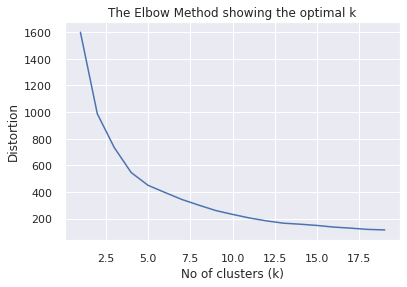

In [121]:
# k-means determine k
distortions = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('No of clusters (k)')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

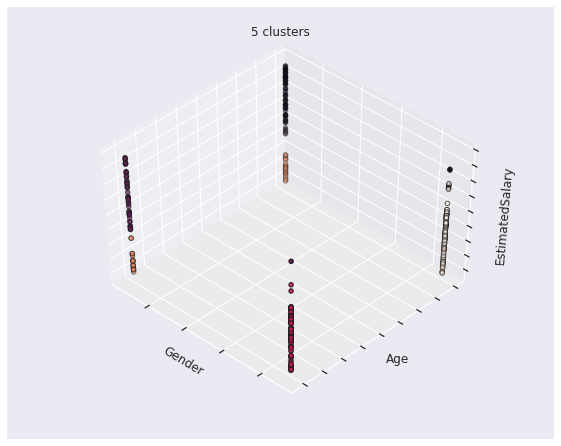

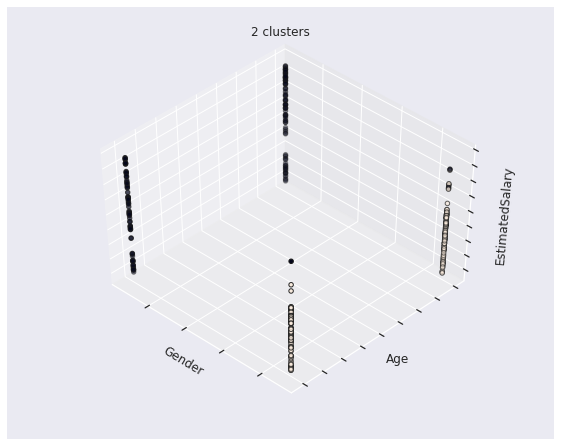

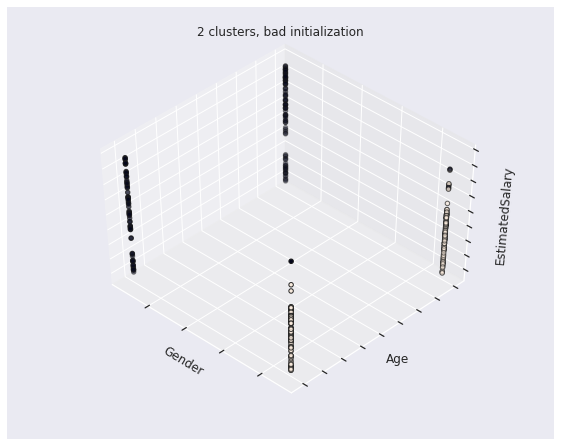

In [122]:
estimators = [('k_means_5', KMeans(n_clusters=5, init='k-means++')),
              ('k_means_2', KMeans(n_clusters=2, init='k-means++')),
              ('k_means_bad_init', KMeans(n_clusters=2, n_init=1, init='random'))]

fignum = 1
titles = ['5 clusters', '2 clusters', '2 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(8, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(df)
    labels = est.labels_

    ax.scatter(df.values[:, 3], df.values[:, 0], df.values[:, 2], c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Gender')
    ax.set_ylabel('Age')
    ax.set_zlabel('EstimatedSalary')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1


In [123]:
#Hierarchical Clustering or Agglomerative clustering.

In [124]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(df)
clustering

AgglomerativeClustering()

In [125]:
clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

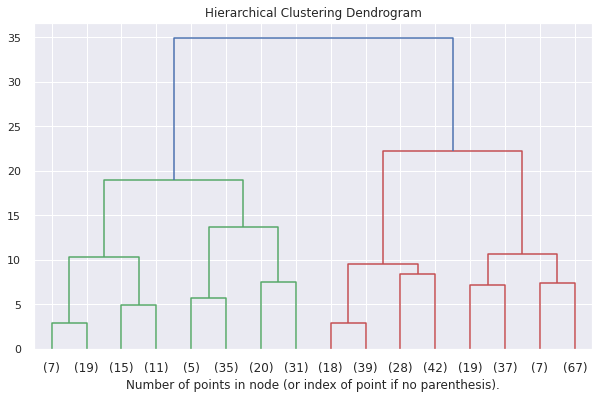

In [126]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df)

plt.figure(fignum, figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
